In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import re

In [5]:
earmarks = pd.read_csv("data/earmarks.csv")
town_shapefiles = gpd.read_file("data/town_shapefile.shp")
pd.set_option('display.max_rows', 500)

earmarks.head()

,Earmark Description,Location,Amount,Administering State Agency,State Agency Contact,Account Number,Earmark Language
0,54th Massachusetts Reenactors and Historical S...,Boston,25000,MMP - Massachusetts Marketing Partnership,Phyllis.cahaly@mass.gov,70021530,"provided further that not less than $25,000 sh..."
1,A Street Pier Boat Ramp Rebuilding,Hull,150000,DCR - Department Of Conservation And Recreation,max.j.tassinari@mass.gov,15992031,"provided further, that not less than $150,000 ..."
2,Abigail Adams Historical Society,Weymouth,25000,ANF - Executive Office For Administration And ...,daniel.shark@mass.gov,15992058,"provided further, that not less than $25,000 s..."
3,Abington Housing Authority Upgrades,Abington,85000,DHCD - Dept Of Housing And Community Development,alain.fabo@mass.gov,70049318,"provided further, that not less than $85,000 s..."
4,Abington Utility Task Vehicle,Abington,28000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,15992043,"provided further, that not less than $28,000 s..."


In [6]:
# Population

population = pd.read_csv("data/ma_census/population.csv", header=1)
population = population.rename(columns={"Geographic Area Name": "city", " !!Total:": "population"}, errors="raise")
# print(population.head())
population = population.loc[:, ["city", "population"]] # Comment this line out if you want less condensed statistics for population, including racial distribution

new_names = {}
for c in population["city"]:
    if c == "Massachusetts":
        new_names[c] = "Massachusetts"
    else:
        new_name = re.sub(r"(( Town)? (city)|(Center)? (CDP))(, )?Massachusetts$", "", c) # Replaces "Massachusetts"
        new_names[c] = new_name
population = population.replace(new_names)
population

,city,population
0,Massachusetts,7029917
1,Abington,17062
2,Acushnet,3030
3,Adams,5466
4,Agawam,28692
5,Amesbury,17366
6,Amherst,39263
7,Andover,9735
8,Arlington,46308
9,Athol,8486


In [7]:
# TODO: clean census towns from the census data cleaned above

In [8]:
median = earmarks["Amount"].median()
mean = earmarks["Amount"].mean()
stddev = earmarks["Amount"].std()
print(mean, stddev) # stddev)

402090.382387022 2103267.934430257


In [9]:
# Agency cleanup
def agency_code(row):
    return row["Administering State Agency"][:3]



earmarks["Agency"] = earmarks.apply (lambda row: agency_code(row), axis=1)
earmarks["Administering State Agency"].value_counts()
earmarks
# TODO: group by agency

,Earmark Description,Location,Amount,Administering State Agency,State Agency Contact,Account Number,Earmark Language,Agency
0,54th Massachusetts Reenactors and Historical S...,Boston,25000,MMP - Massachusetts Marketing Partnership,Phyllis.cahaly@mass.gov,70021530,"provided further that not less than $25,000 sh...",MMP
1,A Street Pier Boat Ramp Rebuilding,Hull,150000,DCR - Department Of Conservation And Recreation,max.j.tassinari@mass.gov,15992031,"provided further, that not less than $150,000 ...",DCR
2,Abigail Adams Historical Society,Weymouth,25000,ANF - Executive Office For Administration And ...,daniel.shark@mass.gov,15992058,"provided further, that not less than $25,000 s...",ANF
3,Abington Housing Authority Upgrades,Abington,85000,DHCD - Dept Of Housing And Community Development,alain.fabo@mass.gov,70049318,"provided further, that not less than $85,000 s...",DHC
4,Abington Utility Task Vehicle,Abington,28000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,15992043,"provided further, that not less than $28,000 s...",HED
...,...,...,...,...,...,...,...,...
858,Wrentham Public Water Supply,Wrentham,150000,DEP - Department Of Environmental Protection,steven.mccurdy@mass.gov,20000015,"provided further, that not less than $150,000 ...",DEP
859,Youth Community Center in Georgetown,Georgetown,25000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,70100013,"provided further, that not less than $25,000 s...",HED
860,Youth Development in Lawrence,Lawrence,200000,LWD - Executive Office Of Labor And Workforce ...,sheila.l.tunney2@mass.gov,70100013,"provided further, that not less than $200,000 ...",LWD
861,YWCA Funding,Statewide,4500000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,15992047,"and provided further, that not less than $4,50...",HED


In [10]:
mpc = earmarks["Location"].value_counts().rename_axis("Location").reset_index(name="counts")
mpc = pd.merge(mpc, earmarks.groupby("Location").sum()["Amount"], on="Location").sort_values(by="Amount", ascending=False)
mpc

,Location,counts,Amount
2,Statewide,27,91655000
0,Boston,106,57670000
211,Norfolk County,1,50000000
26,Framingham,6,14050000
6,Lynn,12,5150000
243,Middlesex County,1,5000000
168,Western Mass,1,5000000
1,Springfield,33,4415000
5,Cape Cod,13,4335000
3,Worcester,16,4250000


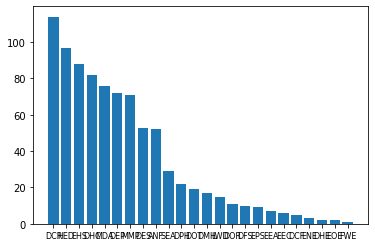

<Figure size 1440x1080 with 0 Axes>

In [11]:
admin = pd.Series(earmarks["Agency"]).value_counts()
plt.bar(admin.index, height=admin.values)
plt.xticks(fontsize=8)
plt.figure(figsize=(20,15))
plt.show()

In [12]:
# Towns with income/inequality -- many towns around Greater Boston and the mill towns out towards the Merrimack River have minority or income distribution inequalities. Are they getting money as these people were affected greatly by COVID-19? What projects did these places have?

# Determined neighborhoods were using the "Environmental
inequality_towns = ["Lawrence", "Lowell", "Haverhill", "Quincy", "Fitchburg", "Brockton", "Chelsea", "Lynn",
                 "New Bedford", "Fall River", "Dedham", "Mattapan", "Roxbury", "Revere", "Southbridge", "Leominster",
                 "Framingham", "Randolph", "Salem", "Milford", "Malden"]
dt_projects = earmarks.loc[earmarks["Location"].isin(inequality_towns)]
diversity = mpc.loc[mpc["Location"].isin(inequality_towns)]
# print(diversity, sum(diversity["Amount"]) / sum(mpc["Amount"]))
# print(dt_projects)

# Including Western towns?
inequality_towns +=  ["Springfield", "Worcester", "Holyoke"]

diversity = mpc.loc[mpc["Location"].isin(inequality_towns)]
dt_projects = earmarks.loc[earmarks["Location"].isin(inequality_towns)].sort_values(by="Location")
print(sum(diversity["Amount"]) / sum(mpc["Amount"]), "of the allocated money going to less-fortunate towns,\n",  len(dt_projects) / len(earmarks), "of the projects being pursued") # How much money is going to these towns' projects?
dt_projects

0.14256319811875368 of the allocated money going to less-fortunate towns,
 0.20046349942062572 of the projects being pursued


,Earmark Description,Location,Amount,Administering State Agency,State Agency Contact,Account Number,Earmark Language,Agency
182,Council on Aging,Brockton,1000000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,15992043,"provided further, that not less than $1,000,00...",HED
564,One Family Workforce Pilot Project,Brockton,510000,LWD - Executive Office Of Labor And Workforce ...,sheila.l.tunney2@mass.gov,70030102,"provided further, that not less than $510,000 ...",LWD
744,"The Charity Guild, Inc.",Brockton,100000,MDAR - Department Of Agricultural Resources,cullen.roberts2@mass.gov,15992050,"provided further, that not less than $100,000 ...",MDA
235,East Middle School Soccer Field Improvements,Brockton,100000,DCR - Department Of Conservation And Recreation,max.j.tassinari@mass.gov,15992031,"provided further, that not less than $100,000 ...",DCR
330,Haitian Community Partners in Brockton,Brockton,100000,EHS - Executive Office Of Health And Human Ser...,Thomas.Statuto@mass.gov,40000013,"provided further, that $100,000 shall be expen...",EHS
404,Kennedy Elementary School,Brockton,250000,DESE - Department Of Elementary & Secondary Ed...,jjou@mass.gov,70100015,"provided further, that not less than $250,000 ...",DES
101,"Brockton Neighborhood Health Center, Inc",Brockton,75000,EHS - Executive Office Of Health And Human Ser...,Thomas.Statuto@mass.gov,40000013,"provided further, that not less than $75,000 s...",EHS
127,Cape Verdean Association of Brockton,Brockton,100000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,15992043,"provided further, that not less than $100,000 ...",HED
413,Latin Women’s Association Food Distribution Pr...,Brockton,25000,MDAR - Department Of Agricultural Resources,cullen.roberts2@mass.gov,15992050,"provided further, that not less than $25,000 s...",MDA
747,The Neighborhood Developers in Chelsea,Chelsea,50000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,70022023,"provided further, that not less than $50,000 s...",HED


In [13]:
# On the other half of the coin, what about places with wealth, like the Metrowest or North Shore?
wealthy_towns = ["Newton", "Brookline", "Cambridge", "Somerville", "Wellesley", "Concord", "Lexington", "Winchester", "Sudbury", "Hopkinton", "Bedford", "Acton", "Holliston", "Reading", "Wilmington", "Gloucester", "Arlington"]
wealth_mpc = mpc.loc[mpc["Location"].isin(wealthy_towns)]
wt_projects = earmarks.loc[earmarks["Location"].isin(wealthy_towns)].sort_values(by="Location")

print(sum(wealth_mpc["Amount"]) / sum(mpc["Amount"]), "of allocated money to wealthy towns\n", len(wt_projects) / len(earmarks), "of projects being pursued")

wt_projects
# It does look like they're being relatively allocated correctly for the most part. Good responsibility!

0.03146649606344595 of allocated money to wealthy towns
 0.08342989571263036 of projects being pursued


,Earmark Description,Location,Amount,Administering State Agency,State Agency Contact,Account Number,Earmark Language,Agency
11,Affordable Housing in Arlington,Arlington,200000,DHCD - Dept Of Housing And Community Development,alain.fabo@mass.gov,70049318,"provided further, that not less than $200,000 ...",DHC
497,Mill Brook Climate Resilience Initiative,Arlington,200000,DCR - Department Of Conservation And Recreation,max.j.tassinari@mass.gov,15992031,"provided further, that not less than $200,000 ...",DCR
34,Arlington Housing Domestic Violence Initiative,Arlington,100000,DHCD - Dept Of Housing And Community Development,alain.fabo@mass.gov,70049318,"provided further, that not less than $100,000 ...",DHC
35,Arlington Playground Replacement Initiative,Arlington,250000,DCR - Department Of Conservation And Recreation,max.j.tassinari@mass.gov,15992031,"provided further, that not less than $250,000 ...",DCR
443,Maintenance of Food Pantry and Address Food In...,Bedford,100000,MDAR - Department Of Agricultural Resources,cullen.roberts2@mass.gov,15992050,"provided further, that not less than $100,000 ...",MDA
56,Bedford Area Chamber of Commerce,Bedford,75000,SEA - Department Of Business And Technology,nhat.le@mass.gov,15992043,"provided further, that not less than $75,000 s...",SEA
379,Implementing Racial Equity Plan in Bedford,Bedford,75000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,15992043,"provided further, that not less than $75,000 s...",HED
212,Discover Brookline Website Expansion,Brookline,85000,MMP - Massachusetts Marketing Partnership,Phyllis.cahaly@mass.gov,70021530,"provided further, that not less than $85,000 s...",MMP
106,Brookline Teen Center Capital Improvements,Brookline,100000,ANF - Executive Office For Administration And ...,daniel.shark@mass.gov,70100015,"provided further, that not less than $100,000 ...",ANF
849,Women Thriving COVID-19 Resiliency,Brookline,50000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,15992043,"provided further, that not less than $50,000 s...",HED


In [14]:
# Quick view
earmarks.sort_values(by="Location")

,Earmark Description,Location,Amount,Administering State Agency,State Agency Contact,Account Number,Earmark Language,Agency
3,Abington Housing Authority Upgrades,Abington,85000,DHCD - Dept Of Housing And Community Development,alain.fabo@mass.gov,70049318,"provided further, that not less than $85,000 s...",DHC
4,Abington Utility Task Vehicle,Abington,28000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,15992043,"provided further, that not less than $28,000 s...",HED
619,Public Housing Maintenance in the Town of Acus...,Acushnet,75000,DHCD - Dept Of Housing And Community Development,alain.fabo@mass.gov,70049318,"provided further, that not less than $75,000 s...",DHC
175,Comprehensive Water Study,Acushnet,75000,DEP - Department Of Environmental Protection,steven.mccurdy@mass.gov,15992032,"provided further, that not less than $75,000 s...",DEP
798,Water and Sewer Infrastructure Improvements,Agawam,100000,DEP - Department Of Environmental Protection,steven.mccurdy@mass.gov,15992032,"provided further, that not less than $100,000 ...",DEP
...,...,...,...,...,...,...,...,...
213,Dismas House Homelessness Prevention,Worcester County,200000,DHCD - Dept Of Housing And Community Development,alain.fabo@mass.gov,70049318,"provided further, that not less than $200,000 ...",DHC
299,Friendly House Inc. Transitional Housing Services,Worcester County,100000,DHCD - Dept Of Housing And Community Development,alain.fabo@mass.gov,70049318,"provided further, that not less than $100,000 ...",DHC
857,Wrentham 350th Anniversary,Wrentham,50000,MMP - Massachusetts Marketing Partnership,Phyllis.cahaly@mass.gov,15992043,"provided further, that not less than $50,000 s...",MMP
858,Wrentham Public Water Supply,Wrentham,150000,DEP - Department Of Environmental Protection,steven.mccurdy@mass.gov,20000015,"provided further, that not less than $150,000 ...",DEP


# Keyword & Category Matching
The following cells below are all keywords to identify category matching. While there's a good list of keywords that will easily match below, I just wanted to give a quick rationale/things that you might find in these categories.

### Categories
#### Essentials
- Health: Anything relating to COVID-19, healthcare, or protection related to COVID-19, like HVAC installation and testing.
- Housing: All projects related to affordable housing, or other initiatives related to housing
- Food: All projects related to food pantries or access to food

#### Non-Essentials
While the overarching category is non-essentials, they are more broader categories that should not necessarily have direct impacts from the pandemic; mostly these are initiatives for public services unrelated to the above
- Arts: Mostly theater and stage productions, or other cultural initiatives. Includes Museums, Theaters, etc.
- Economic: Business, commerce, or other economic incentives
- Education: Anything related to Primary/Secondary education, or libraries
- Environment: Many projects in these earmarks correlate to rehabilitation of beaches, or improvement of water or sewage networks.
- Essential Services: Ironically, these are closer to improvements towards fire/police stations, not necessarily funding for them
- Equality: Most projects that are geared towards minority groups or societies. Also includes advocacy groups and initiatives designed to bring up veterans.
- Historical: You'd be surprised how many there are with just one keyword
- Human Services: Any project relating to family, youth, teen, or public safety development. Also includes mental health
- Occupational: Projects relating to job training or initiatives to help people find work
- Recreation: Projects relating to recreational facilities such as parks, sports centers, and even sidewalks
- Transport: All projects relating to transport. Keywords omit "rail" as many could be projects for rail trails.
- Technology: Many projects in earmarks are related to upgrading facilities with new technology

#### Accessibility, Maintenance and Research
I've specifically separated these three as they're more broad reaching categories that could fit in any of the above. But these are really just improvements or studies.
- Accessibility: Any project relating to improving the quality of life for handicap people
- Maintenance: Any project relating to literally repairing, replacing, upgrading, restoring, improving, rebuilding, etc.
- Research: Any project relating to a feasibility study or a normal study

These categories are generally in flux as I add keywords to better represent all projects, and I will sometimes update manually to fix exceptions.

In [21]:
# Keyword Matching

keywords_to_categories = {

    # essentials

    "Health": ["covid", "testing", "primary care", "HVAC", "health", "emergency", "paramedic"],
    "Housing": ["housing", "home", "homeless", "relocation"],
    "Food": ["food", "pantry", "servings"],

    # non-essentials

    "Arts": ["arts", "theater", "stage", "cultur", "museum", "exhibit", "media"],
    "Construction": ["building", "construction"],
    "Economic": ["commerce", "economic", "business"],
    "Education": ["school", "library", "books", "tutoring", "education", "academic"],
    "Environment": ["water", "beach", "sewer", "environment", "flood", "storm", "invasive species", "conservation", "wildlife", "climate", "solar"],
    "Essential Services": ["police department", "fire department"],
    "Equality": ["black", "asian", "women", "haiti", "hispanic", "latin", "LGBT", "seniors", "elders", "diversity", "veterans", "equity", "equality", "naacp", "caribbean", "legion", "disproportionate", "vfw"],
    "Events": ["first night", "celebration", "parade"],
    "Historical": ["historic", "history", "war"],
    "Human Services": ["family", "elder", "senior", "aging", "public safety", "immigrant", "community center", "age", "veterinar", "translation", "domestic violence"],
    "Mental Health": ["mental health" "behavioral health"],
    "Occupational": ["training", "job", "work"],
    "Recreation": ["park", "trail", "sidewalk", "garden", "tennis", "basketball", "soccer", "sports", "pond", "tree", "lighting", "walk", "arboretum"],
    "Rehabilitation": ["addiction", "substance"],
    "Religious": ["temple", "church", "ministry", "jewish",],
    "Transport": ["transport", "vehicle", "road", "train", "bus", "route"],
    "Technology": ["tech", " it ", "tech", "paperless", "fiber optic", "cable", "broadband", "digital", "website", "wireless", "electric", "software"],
    "Youth Programs": ["youth", "ymca", "boys and girls", "teen", "children"],

    # upkeep, research, acessibility
    "Accessibility": ["blind", "handicap", "ADA", "accessible"],
    "Maintenance": ["maintenance", "repair", "replacement", "upgrade", "upkeep", "restoration", "improvement", "rebuild", "renovation", "preservation", "clean"],
    "Research": ["research", "survey", "study", "assessment", "project", "design", "plan"]
}

keywords = keywords_to_categories.keys()


In [22]:
def match_keywords(row):
    def in_category(keyword_list, text):
        for k in keyword_list:
            if k in text.lower():
                return True
        return False

    desc = row["Earmark Description"]
    lang = row["Earmark Language"]
    desc_matches = set([k for k in keywords_to_categories if in_category(keywords_to_categories[k], desc)])
    lang_matches = set([k for k in keywords_to_categories if in_category(keywords_to_categories[k], lang)])

    return desc_matches.union(lang_matches)

In [23]:
# Matching keywords to categories, new column for categories

f = lambda x: ', '.join(str(k) for k in match_keywords(x))
cats = earmarks.apply(f, axis=1)
for c in cats:
    if c == "":
        c = "Other"
earmarks["Categories"] = cats
earmarks

,Earmark Description,Location,Amount,Administering State Agency,State Agency Contact,Account Number,Earmark Language,Agency,Categories
0,54th Massachusetts Reenactors and Historical S...,Boston,25000,MMP - Massachusetts Marketing Partnership,Phyllis.cahaly@mass.gov,70021530,"provided further that not less than $25,000 sh...",MMP,Historical
1,A Street Pier Boat Ramp Rebuilding,Hull,150000,DCR - Department Of Conservation And Recreation,max.j.tassinari@mass.gov,15992031,"provided further, that not less than $150,000 ...",DCR,"Recreation, Construction, Maintenance"
2,Abigail Adams Historical Society,Weymouth,25000,ANF - Executive Office For Administration And ...,daniel.shark@mass.gov,15992058,"provided further, that not less than $25,000 s...",ANF,Historical
3,Abington Housing Authority Upgrades,Abington,85000,DHCD - Dept Of Housing And Community Development,alain.fabo@mass.gov,70049318,"provided further, that not less than $85,000 s...",DHC,"Housing, Maintenance"
4,Abington Utility Task Vehicle,Abington,28000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,15992043,"provided further, that not less than $28,000 s...",HED,Transport
...,...,...,...,...,...,...,...,...,...
858,Wrentham Public Water Supply,Wrentham,150000,DEP - Department Of Environmental Protection,steven.mccurdy@mass.gov,20000015,"provided further, that not less than $150,000 ...",DEP,"Environment, Research"
859,Youth Community Center in Georgetown,Georgetown,25000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,70100013,"provided further, that not less than $25,000 s...",HED,"Youth Programs, Human Services"
860,Youth Development in Lawrence,Lawrence,200000,LWD - Executive Office Of Labor And Workforce ...,sheila.l.tunney2@mass.gov,70100013,"provided further, that not less than $200,000 ...",LWD,Youth Programs
861,YWCA Funding,Statewide,4500000,HED - Executive Office Of Economic Development,rory.c.ohanlon@mass.gov,15992047,"and provided further, that not less than $4,50...",HED,"Economic, Maintenance, Human Services, Equalit..."


In [24]:
# Quick outputs

earmarks.to_csv(path_or_buf="out/earmarks_categories.csv")
earmarks.loc[earmarks["Categories"] == ""].to_csv(path_or_buf="out/earmarks_without_categories.csv")

In [19]:
# Plotting & visualization for later
# town_shapefiles.plot()

In [20]:
# This is just something that bugged me while I was looking at something in Lawrence -- ironically the project says "Rail Construction"
print(earmarks.loc[419]["Earmark Language"])

provided further, that not less than $500,000 shall be expended for the city of Lawrence for the construction and expansion of a rail trail
